## IMPORT LIBRARY

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## LOAD DATASET

In [2]:
df = pd.read_csv('/content/WorldHits.csv')
df.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Release,Afro Celt Sound System,Volume 2: Release (Real World Gold),2005,456160,4,0.633,0.828,5,-7.266,0,0.0480,0.0216,0.055800,0.1080,0.537,100.089,31
1,Saor / Free / News from Nowhere,Afro Celt Sound System,Vol. 1: Sound Magic (Real World Gold),1999,501093,4,0.511,0.524,7,-10.504,1,0.0305,0.0260,0.879000,0.1060,0.118,81.996,24
2,When You're Falling,Afro Celt Sound System,Volume 3 : Further In Time (Real World Gold),2003,314160,4,0.638,0.822,11,-7.305,1,0.0380,0.0508,0.000025,0.0895,0.802,99.010,36
3,Whirl-Y-Reel 1,Afro Celt Sound System,Vol. 1: Sound Magic (Real World Gold),1999,441200,4,0.645,0.810,2,-8.133,1,0.0381,0.1320,0.395000,0.0825,0.530,132.021,25
4,Electric Rendezvous,Al Di Meola,Electric Rendezvous,1982,467266,4,0.337,0.658,9,-12.241,1,0.0388,0.1010,0.748000,0.1130,0.507,108.143,19


## FITUR DAN TARGET

In [3]:
X = df.drop("Popularity", axis=1)
y = df["Popularity"]

## NORMALISASI FITUR-FITUR

In [13]:
#inisialisasi Min Max Scaller
scaler = StandardScaler()

#Numerical Columns
num_col_ = [col for col in df.columns if df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]

#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,0.994565,0.457537,0.266382,0.649909,1.258894,-0.122702,0.880083,-1.310216,-0.202722,-1.502828,-0.535778,-0.509861,0.123627,-0.564485,0.166502
1,0.520663,0.625425,0.266382,-0.066864,0.084626,0.436752,0.251529,0.763233,-0.469357,-1.489546,1.855219,-0.519362,-1.428387,-1.207658,-0.272755
2,0.836598,-0.073032,0.266382,0.679285,1.235717,1.555662,0.872512,0.763233,-0.355085,-1.414683,-0.697776,-0.597738,1.105211,-0.602842,0.480256
3,0.520663,0.401640,0.266382,0.720411,1.189365,-0.961885,0.711783,0.763233,-0.353561,-1.169568,0.449434,-0.630989,0.097698,0.570638,-0.210004
4,-0.822061,0.499033,0.266382,-1.089145,0.602231,0.996207,-0.085654,0.763233,-0.342896,-1.263146,1.474728,-0.486111,0.012504,-0.278181,-0.586510


## MEMBAGI DATA KE DALAM SET PELATIHAN DAN VALIDASI

In [14]:
X_train, X_val, y_train, y_val = train_test_split(x1, y, test_size=0.2, random_state=42)

## MEMBANGUN MODEL DNN

In [15]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## KOMPILASI MODEL

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

## MELATIH MODEL

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1013.3095 - mae: 27.4747 - val_loss: 1175.7960 - val_mae: 29.4573
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 972.4519 - mae: 27.4638 - val_loss: 1153.9836 - val_mae: 29.0944
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 996.0354 - mae: 27.3659 - val_loss: 1129.4171 - val_mae: 28.6985
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 988.1882 - mae: 27.1812 - val_loss: 1096.7469 - val_mae: 28.1913
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 935.3579 - mae: 26.4519 - val_loss: 1051.3960 - val_mae: 27.4888
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 841.3457 - mae: 24.8111 - val_loss: 986.8398 - val_mae: 26.4631
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 749.5709 - mae: 23.1330 - val_loss: 899.8640 - val_mae: 25.0543
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 753.4475 - mae: 22.8517 - val_loss: 785.9484 - val_mae: 23.2253
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━

## EVALUASI MODEL

In [21]:
train_loss, train_mae = model.evaluate(X_train, y_train)
val_loss, val_mae = model.evaluate(X_val, y_val)

print(f"Training Loss: {train_loss}, Training MAE: {train_mae}")
print(f"Validation Loss: {val_loss}, Validation MAE: {val_mae}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3607 - mae: 2.8654
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.4856 - mae: 4.6553 
Training Loss: 14.052074432373047, Training MAE: 2.966710329055786
Validation Loss: 38.89777374267578, Validation MAE: 4.699486255645752


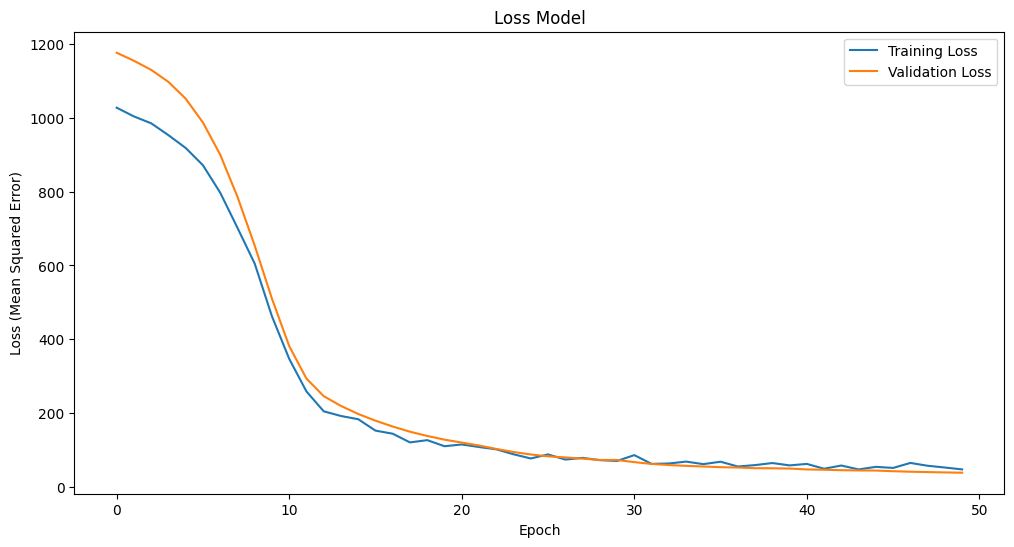

In [24]:
# Plot nilai loss (kesalahan) pelatihan & validasi
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.ylabel('Loss (Mean Squared Error)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

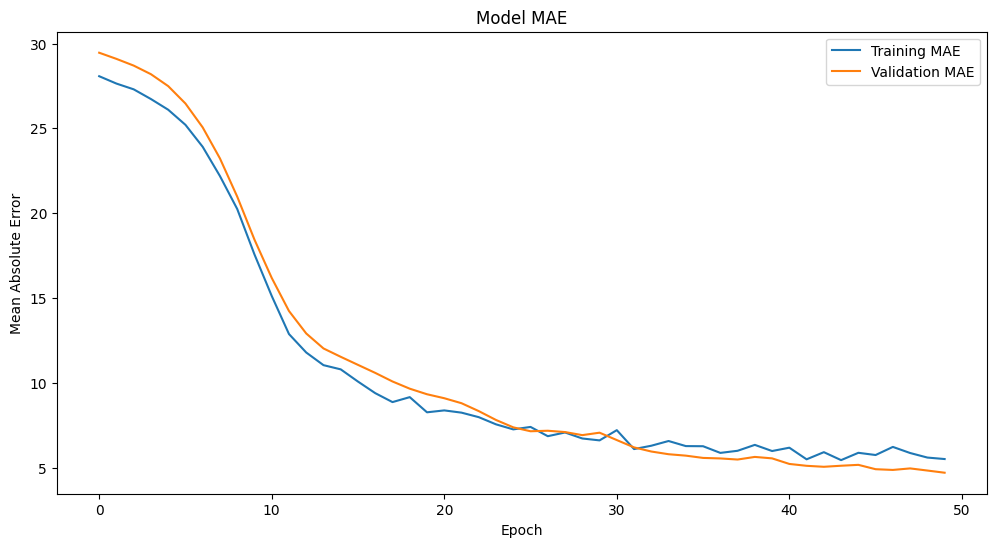

In [25]:
# Plot nilai MAE (Mean Absolute Error) pelatihan & validasi
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Model deep learning ini dibangun untuk tugas regresi menggunakan dataset yang telah diproses. Data numerik distandarisas terlebih dahulu menggunakan StandardScaler, kemudian dibagi menjadi set pelatihan dan validasi. Model deep learning ini menggunakan arsitektur Sequential dengan beberapa lapisan tersembunyi dan dropout untuk mencegah overfitting. Optimizer adam digunakan dengan Mean Squared Error (MSE) sebagai fungsi kerugian dan Mean Absolute Error (MAE) sebagai metrik evaluasi. Model dilatih selama 100 epoch dengan memonitor kinerja pada set validasi. Setelah pelatihan, hasil evaluasi dari data pelatihan dan validasi ditampilkan dan kinerja model divisualisasikan melalui grafik loss dan MAE untuk memahami bagaimana model belajar. Kesimpulan dari visualisasi ini membantu menentukan apakah model mengalami overfitting atau underfitting